In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from scipy.stats import zscore, boxcox
import statsmodels.formula.api as smf
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pickle

import warnings
warnings.filterwarnings('ignore')

### importing dataset

In [2]:
#storing the file path/ url path in a variable
df0 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [3]:
#read top 5 rows of the data
df0.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df0.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df0.shape[0], df0.shape[1]))

Rows: 614 Columns: 13


In [6]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(614, 13)
 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


### there are some object data, we will handle it later

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### gender,married,dependents,self_employed,loan amount,loan amount term and credit history has null values

In [8]:
df0.duplicated().sum()

0

### no duplicate value

In [9]:
# Statistical summary
df0.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [10]:
#total missing values
df0.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### gender has 13,married has 3,dependents has 15,self_employed has 32,loan amount has 22,loan amount term has 14 and credit history has 50 has null values

In [11]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome    273
LoanAmount             0
Loan_Amount_Term       0
Credit_History        89
Property_Area          0
Loan_Status            0
dtype: int64

### coapplicant income has 273 zero values and credit history has 89 zero values in the dataset

In [13]:
# Checking the counts of label categories
loan_Status = df0['Loan_Status'].value_counts(normalize=True)
round(loan_Status * 100, 2).astype('str') + ' %'

Y    68.73 %
N    31.27 %
Name: Loan_Status, dtype: object

### 68.73%  has loan_status and 31.27% has no loan_status

In [14]:
columns = df0.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_").lower() for column in columns]
df0.columns = columns_renamed
df0.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [15]:
df1=df0.copy()

In [16]:
df1.drop("loan_id",axis=1,inplace=True)

### no need of this data

In [17]:
df1.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

## filling null values from the particular columns 

In [20]:
for i in [df1]:
    i["gender"] =i["gender"].fillna(df1.gender.dropna().mode()[0])
    i["married"] =i["married"].fillna(df1.married.dropna().mode()[0])
    i["dependents"]=i["dependents"].fillna(df1.dependents.dropna().mode()[0])
    i["self_employed"]=i["self_employed"].fillna(df1.self_employed.dropna().mode()[0])
    i["loanamount"]=i["loanamount"].fillna(df1.loanamount.dropna().mode()[0])
    i["loan_amount_term"]=i["loan_amount_term"].fillna(df1.loan_amount_term.dropna().mode()[0])
    i["credit_history"]=i["credit_history"].fillna(df1.credit_history.dropna().mode()[0])

In [21]:
df1.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### now it has no null values

# Visualization

# 1.

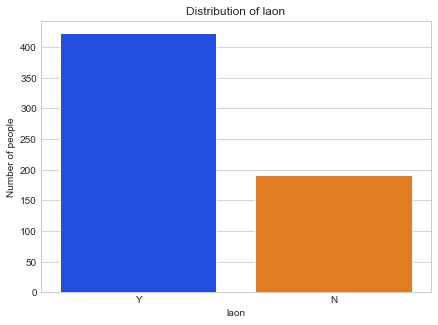

In [26]:
# Creating a barplot for 'laon_status'
loan = df1["loan_status"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(loan.index, loan.values, palette='bright')
plt.title('Distribution of laon')
plt.xlabel('laon')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### most have loan status

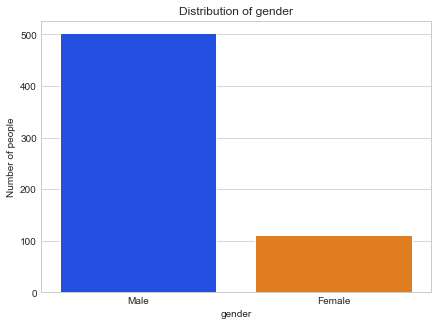

In [28]:
# Creating a barplot for 'gender'
gender = df1["gender"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(gender.index,gender.values, palette='bright')
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### male has greater number in this dataset

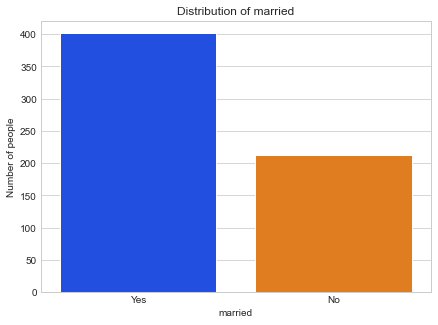

In [29]:
# Creating a barplot for 'married'
married= df1["married"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(married.index,married.values, palette='bright')
plt.title('Distribution of married')
plt.xlabel('married')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### more people have married 

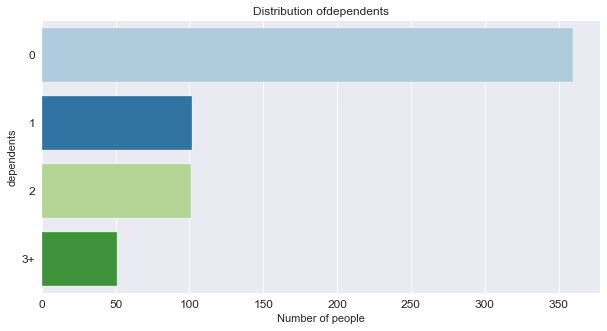

In [30]:
# Creating a barplot for 'dependents'
dep= df1['dependents'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(dep.values,dep.index, palette='Paired')
plt.title('Distribution ofdependents')
plt.xlabel('Number of people')
plt.ylabel('dependents')
plt.tick_params(labelsize=12)
plt.show()

### independent people has more number than the people who are dependent on others

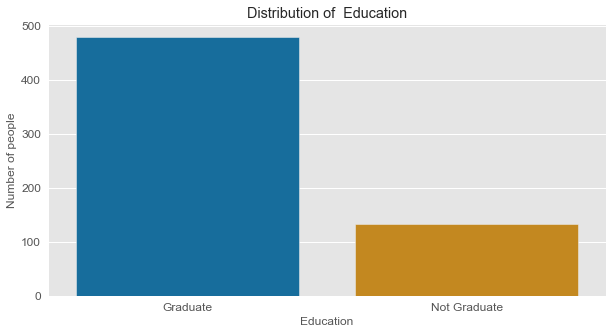

In [31]:
# Creating a barplot for ' Education'
edu= df1['education'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu.index, edu.values, palette='colorblind')
plt.title('Distribution of  Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()

### more people has graduated 

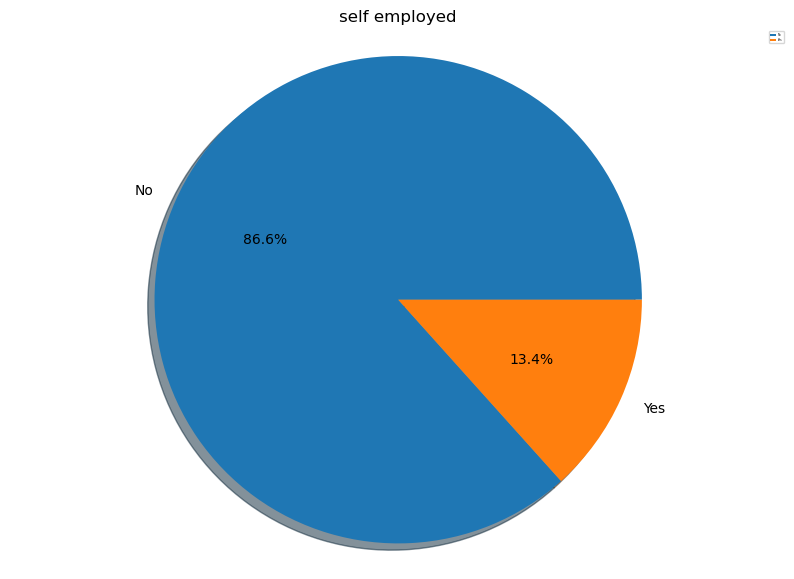

In [32]:
# Creating a pie chart for 'self_employed'
employed = df1['self_employed'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(employed.values, labels=employed.index,shadow=True, autopct='%1.1f%%')
plt.title('self employed')
plt.legend()
plt.legend(prop={'size': 2})
plt.axis('equal')
plt.show()

### number of self employed people is very less

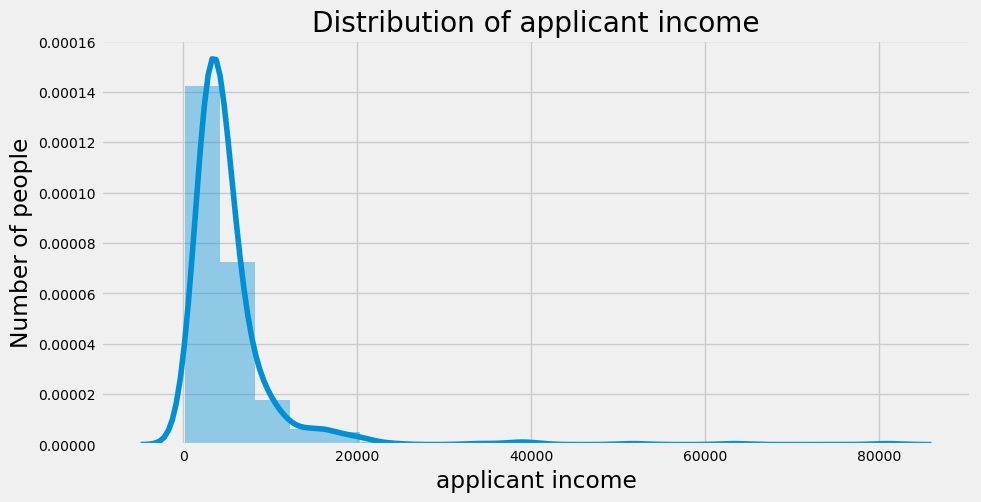

In [39]:
# Creating a distribution plot for 'applicant income'
applicant_income= df1['applicantincome'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df1['applicantincome'], bins=20)
plt.title('Distribution of applicant income')
plt.xlabel('applicant income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### mostly people belong from the income group ranges from 0 to 20k 

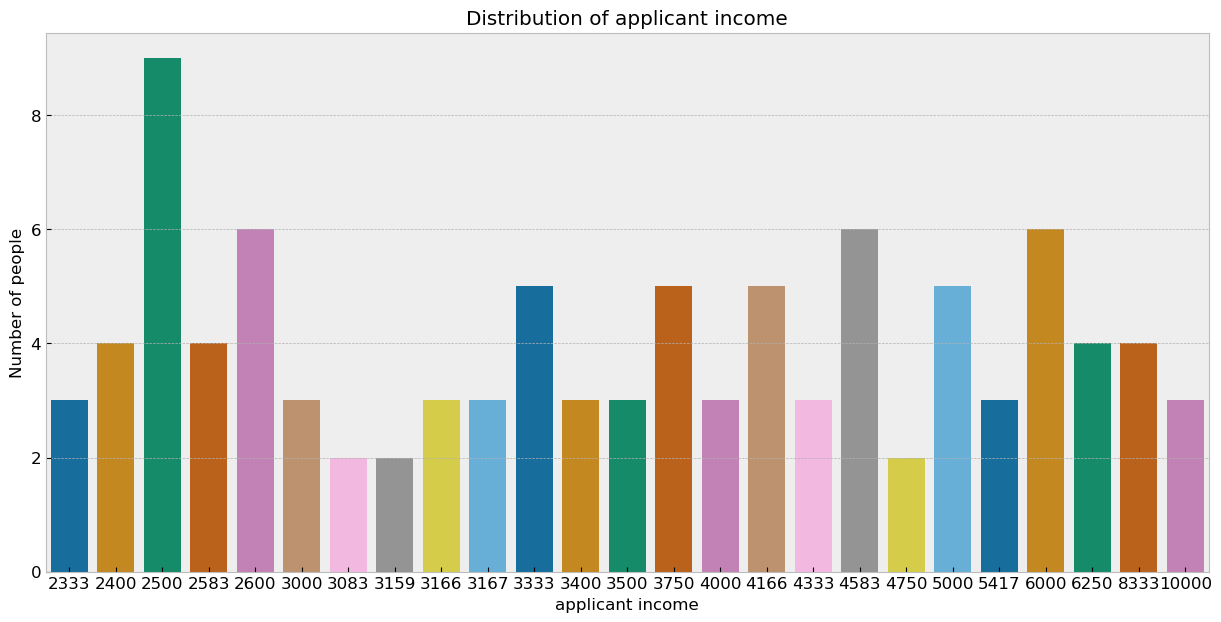

In [36]:
# Creating a barplot for 'applicant income'
applicant_income= df1['applicantincome'].value_counts().head(25)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(applicant_income.index,applicant_income.values, palette='colorblind')
plt.title('Distribution of applicant income')
plt.xlabel('applicant income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()


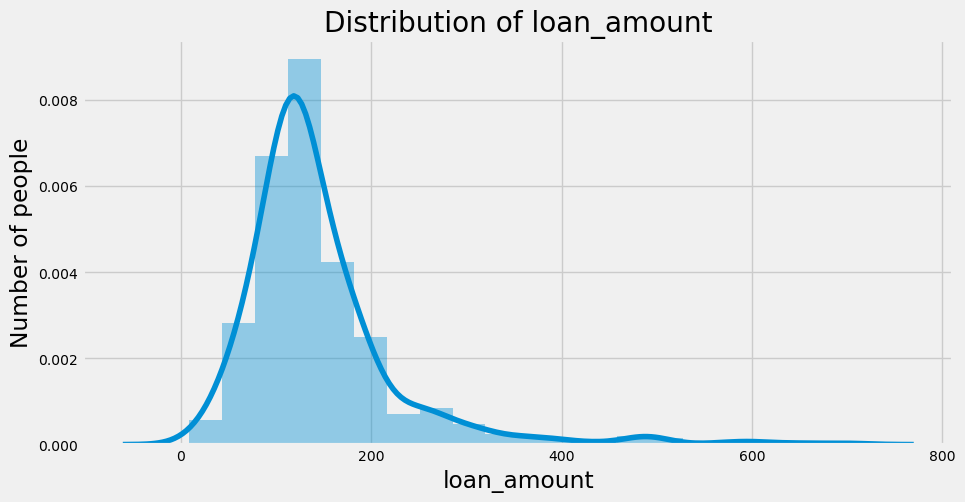

In [40]:
# Creating a distribution plot for 'loan amount'
loan_amount= df1['loanamount'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(df1['loanamount'], bins=20)
plt.title('Distribution of loan_amount')
plt.xlabel('loan_amount')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### loan amount ranges from 0 to 200 mostly

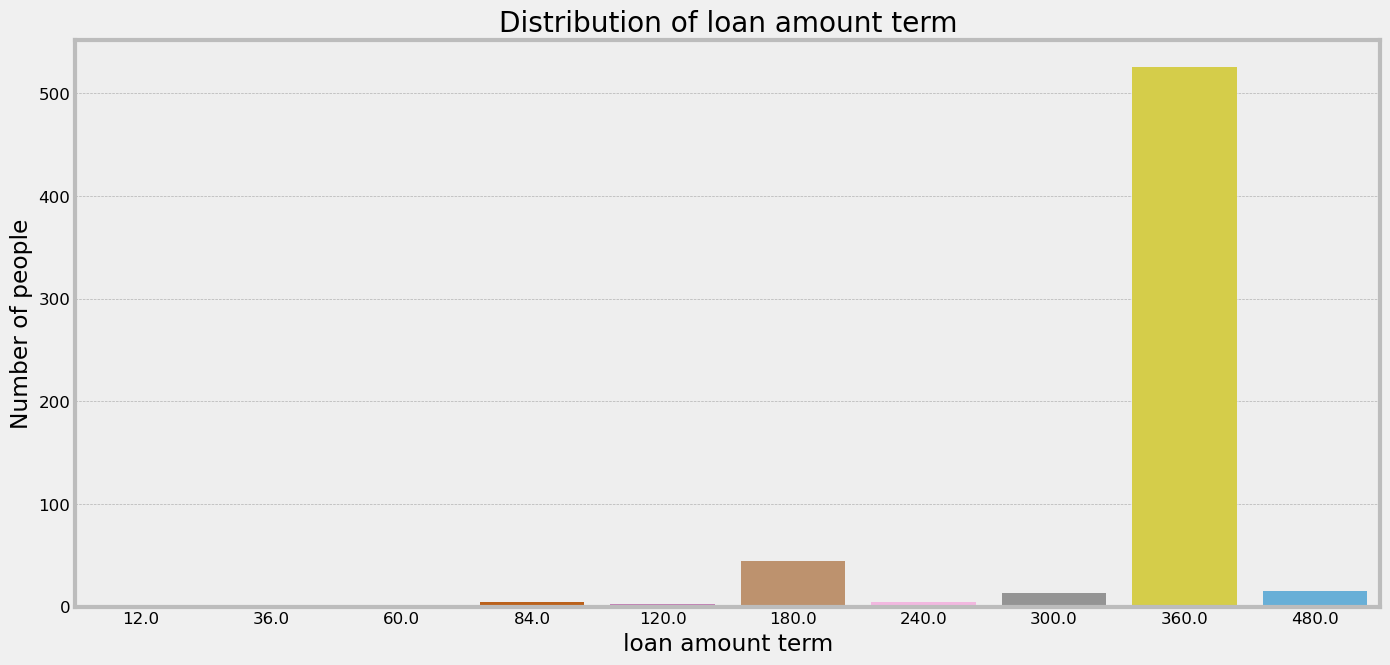

In [42]:
# Creating a barplot for 'loan_amount_term'
loanamountterm= df1['loan_amount_term'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(loanamountterm.index,loanamountterm.values, palette='colorblind')
plt.title('Distribution of loan amount term')
plt.xlabel('loan amount term')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.show()


### 360 has highest number

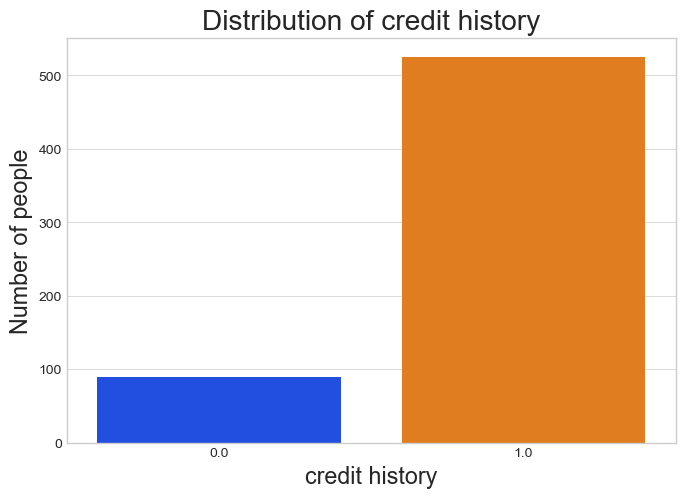

In [43]:
# Creating a barplot for 'credit_history'
credithistory= df1["credit_history"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(credithistory.index,credithistory.values, palette='bright')
plt.title('Distribution of credit history')
plt.xlabel('credit history')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### number of people has credit history

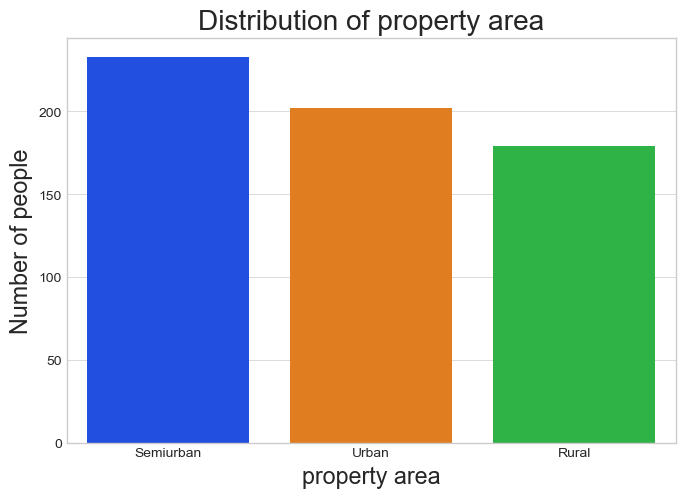

In [44]:
# Creating a barplot for 'property_area'
propertyarea= df1["property_area"].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7,5))
sns.barplot(propertyarea.index,propertyarea.values, palette='bright')
plt.title('Distribution of property area')
plt.xlabel('property area')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

### property area has 3 option semiurban,urban and rural and highest no of people belong to semiurban area

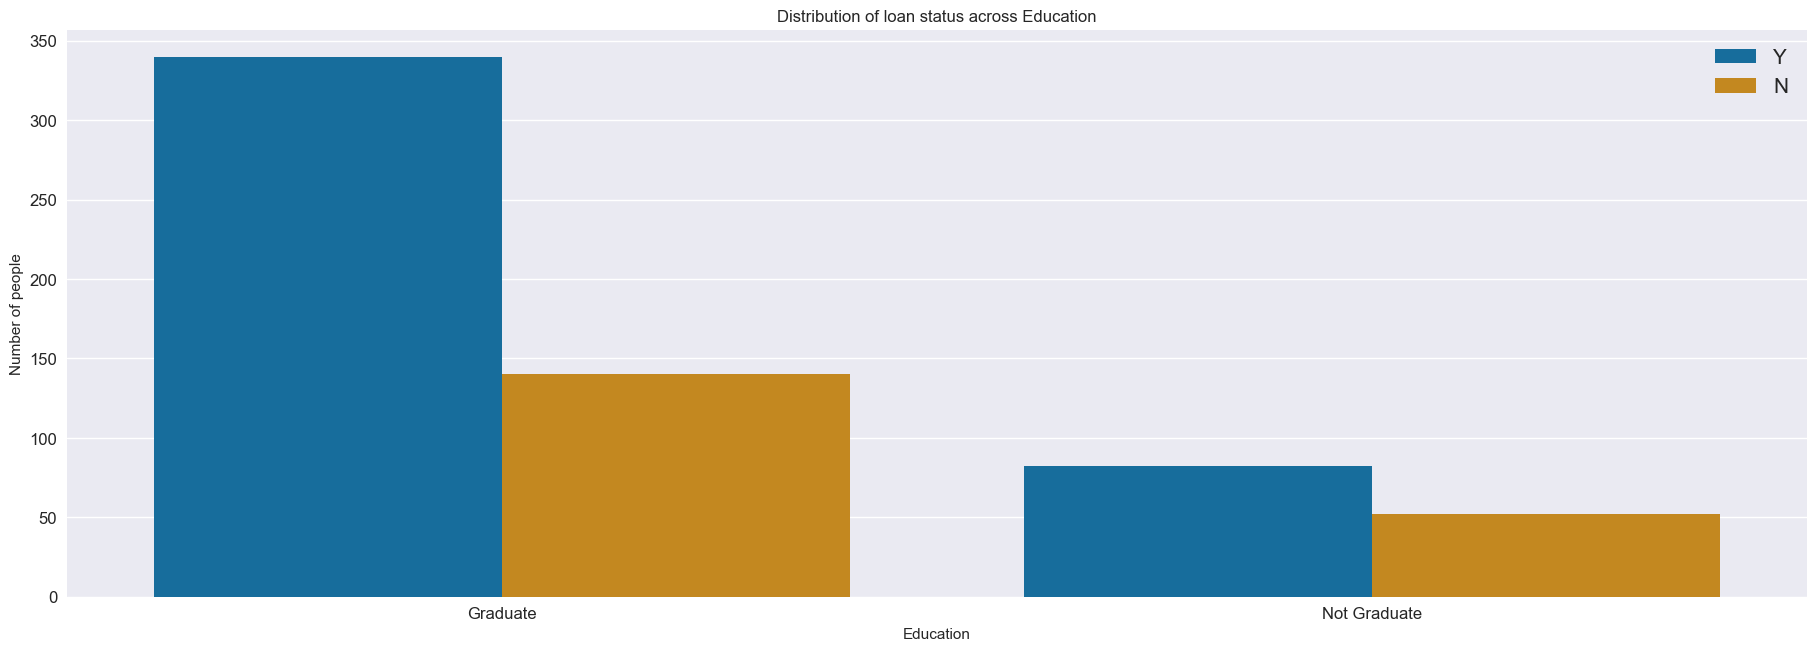

In [45]:
# Creating a countplot of loan status across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df1['education'],
              hue=df1['loan_status'], palette='colorblind')
plt.title('Distribution of loan status across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### in both case number of people has taken the loan

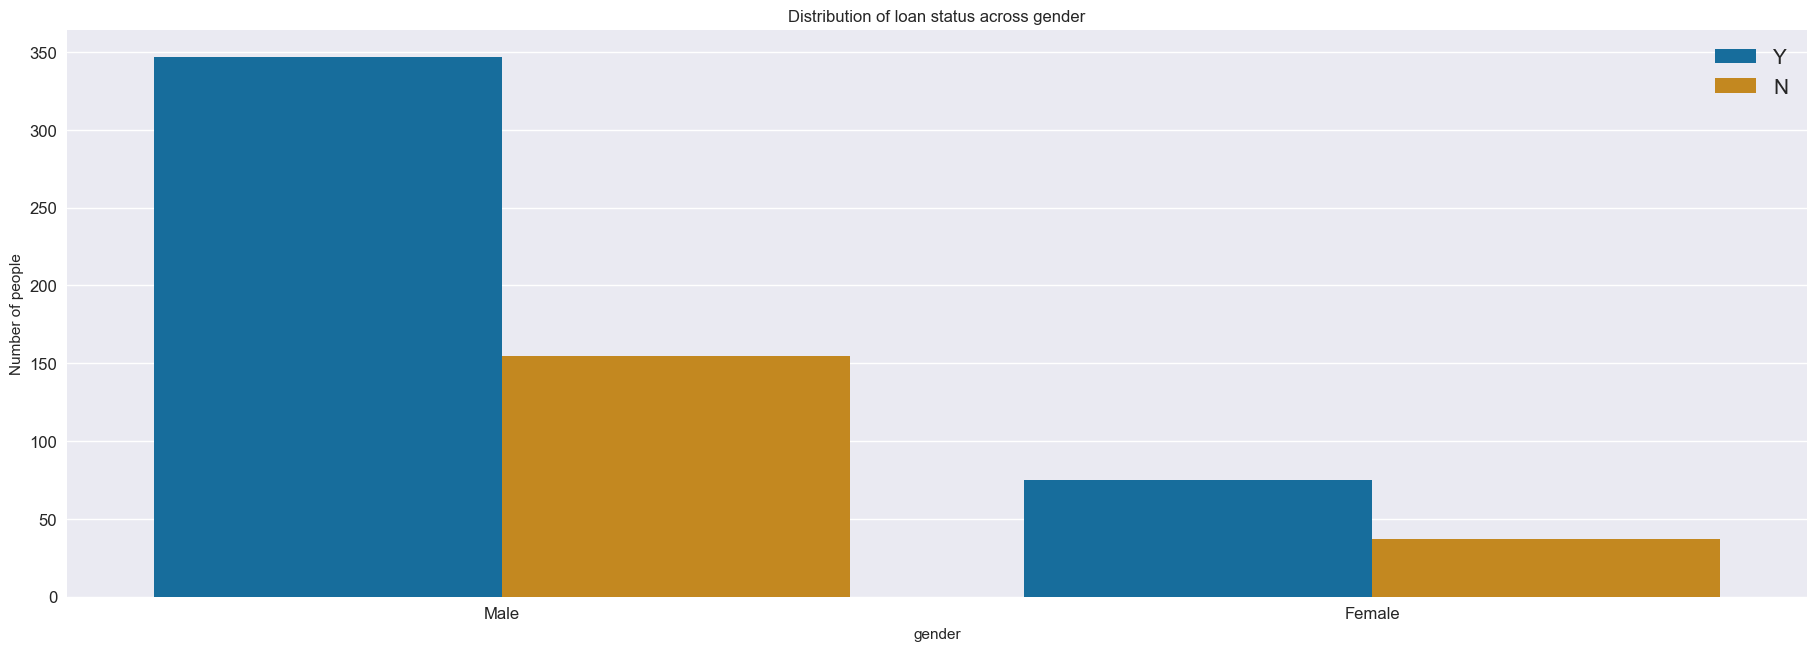

In [46]:
# Creating a countplot of loan status across gender
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(df1['gender'],
              hue=df1['loan_status'], palette='colorblind')
plt.title('Distribution of loan status across gender')
plt.xlabel('gender')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### male has more number who had taken the loan and in female no of loan taken ia greater than the number of female who had not taken the loan

In [47]:
df2=df1.copy()

## encoding the obect data

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
columns=['loan_status','gender','education','self_employed','married','dependents','property_area']
for x in columns:
    df2[x]= le.fit_transform(df2[x])
    
df2

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [60]:
df3=df2.copy()

## checking the skewness

In [61]:
from scipy.stats import skew
from scipy import stats

gender
-1.644764550585881


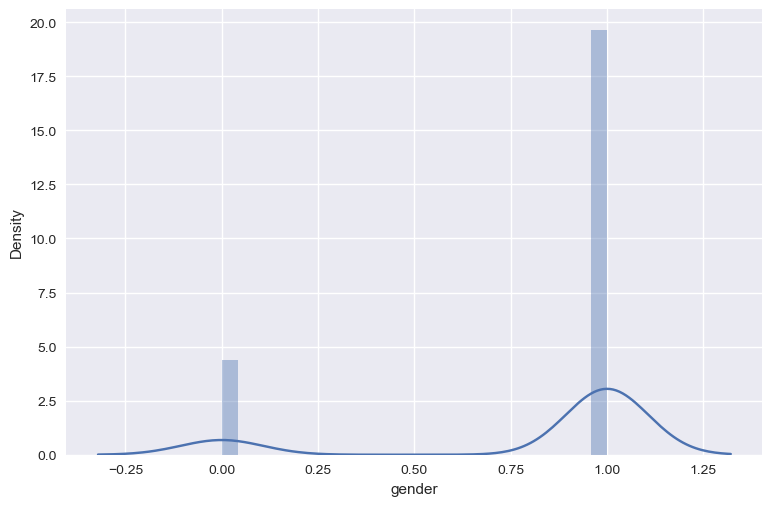

married
-0.6432737969221631


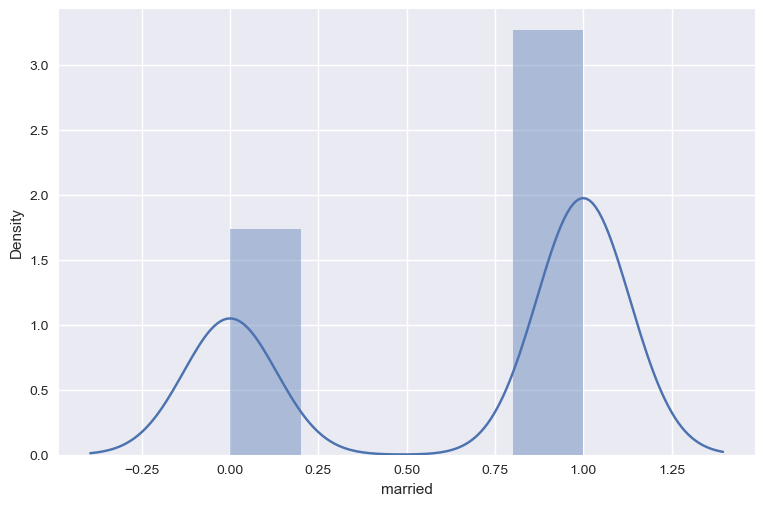

dependents
1.0130683122414248


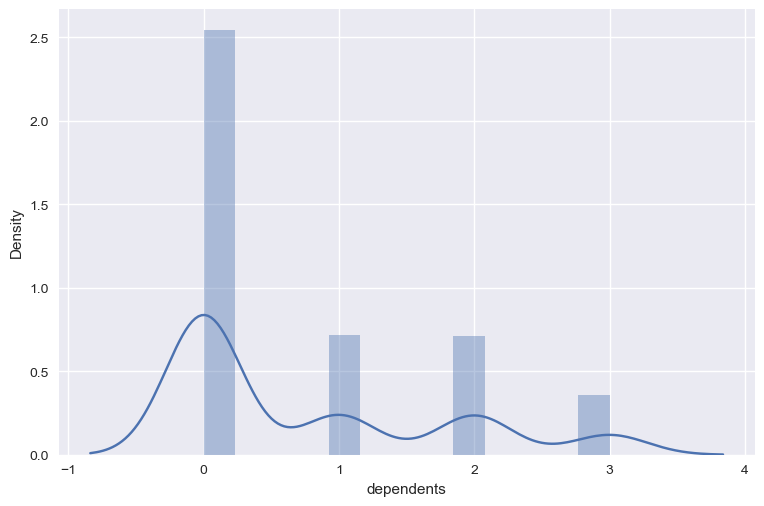

education
1.3642786441579564


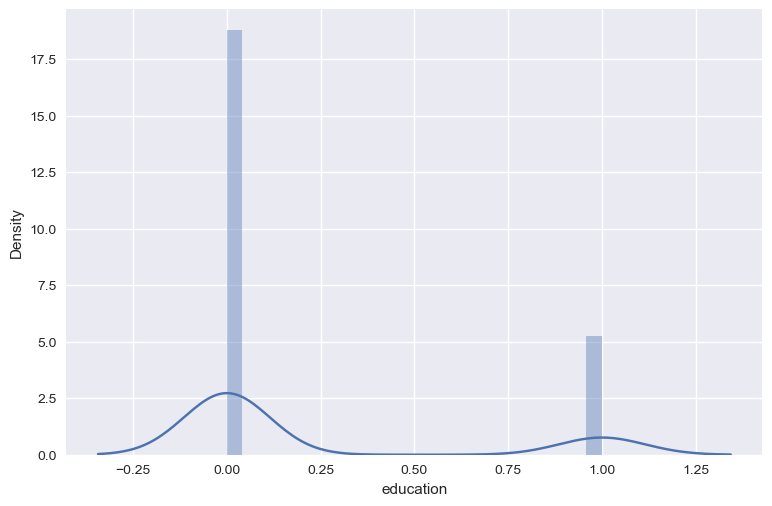

self_employed
2.1545162372084


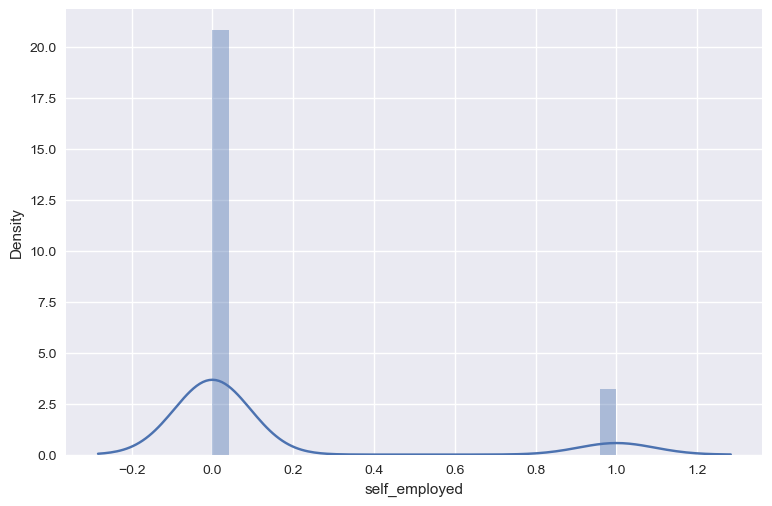

applicantincome
6.523526250899361


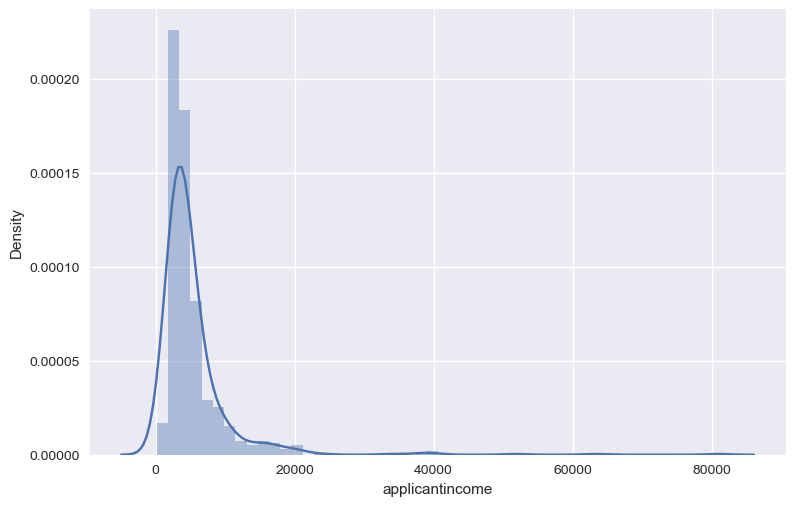

coapplicantincome
7.473216996340462


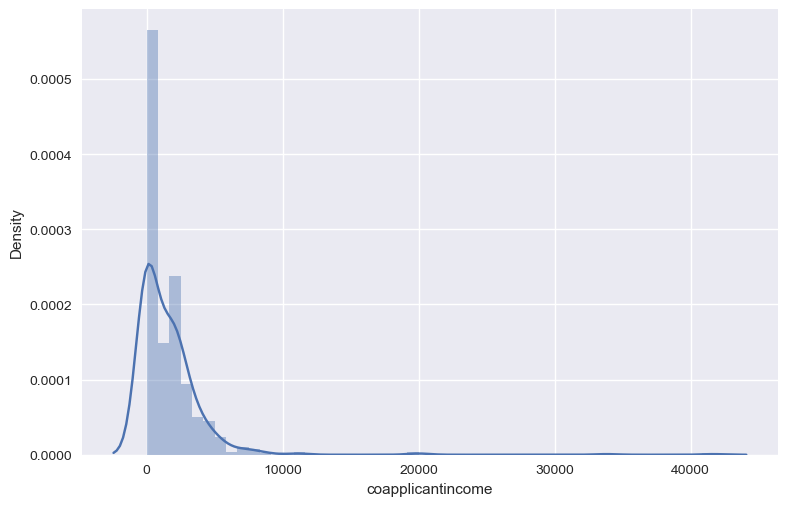

loanamount
2.73869518774095


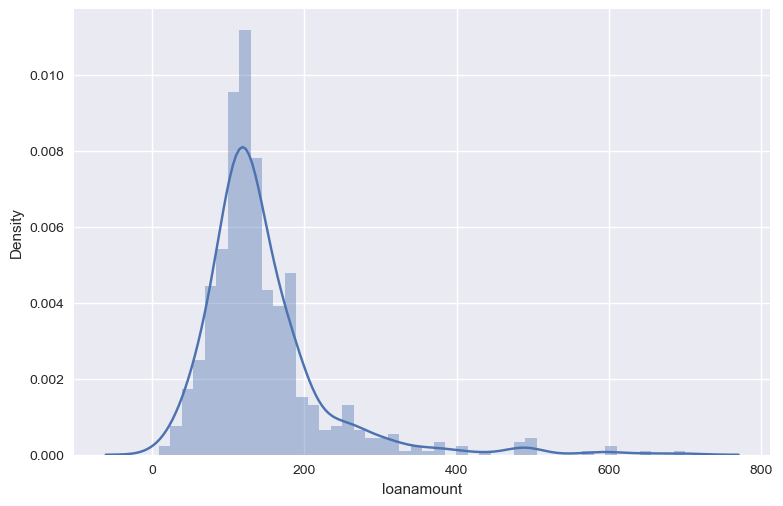

loan_amount_term
-2.396239917101247


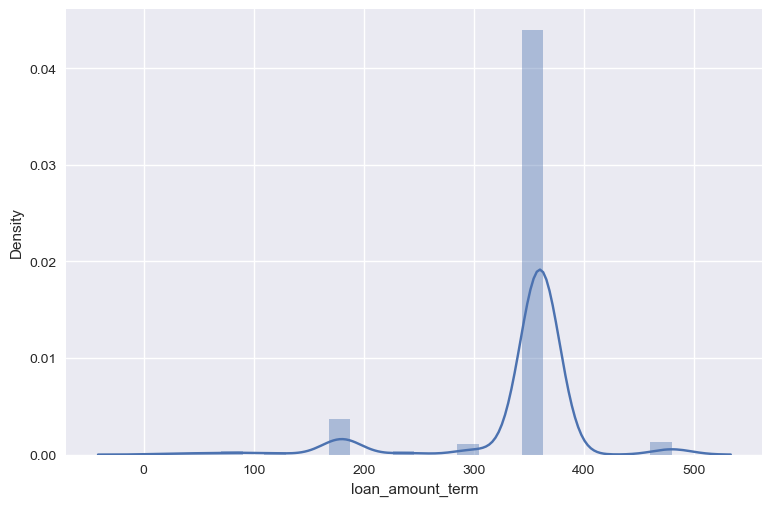

credit_history
-2.0170275689782207


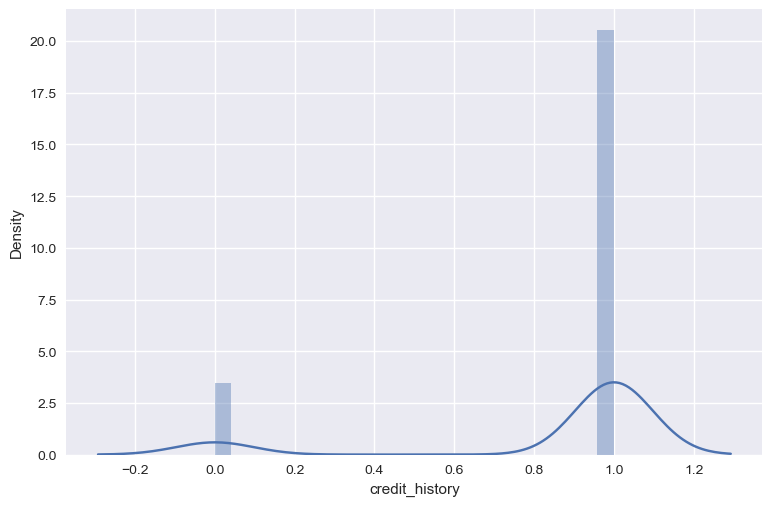

property_area
-0.06603431807343829


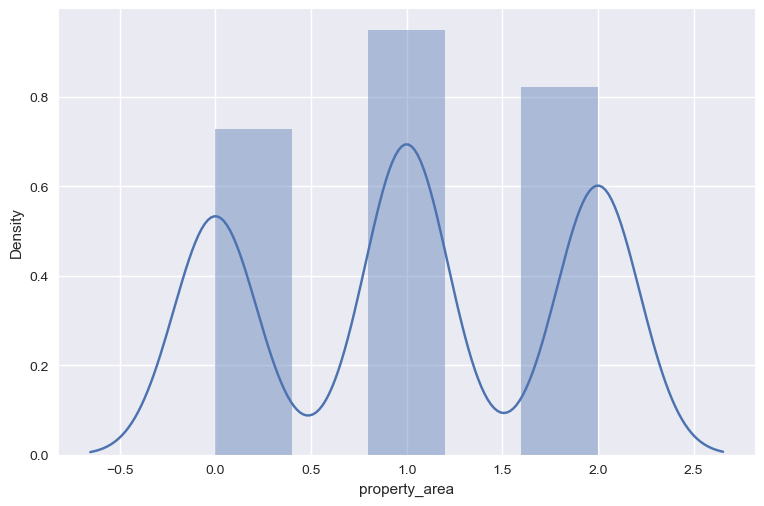

loan_status
-0.8080179267715549


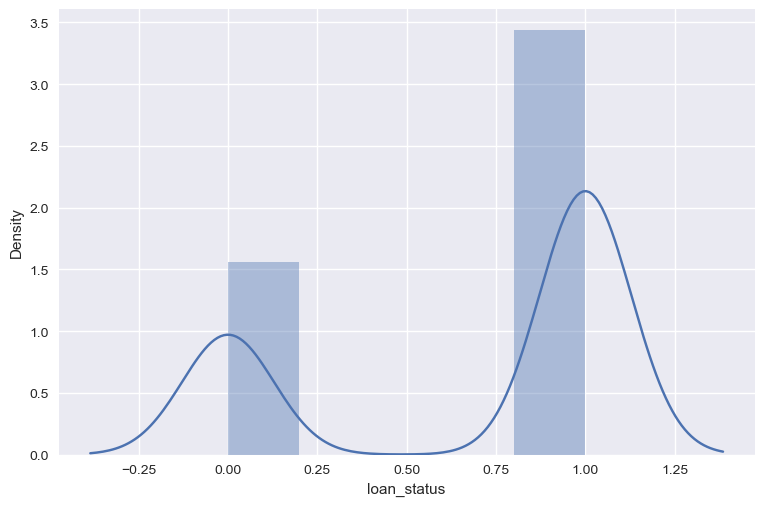

In [62]:
for col in df3:
    print(col)
    print(skew(df3[col]))
    
    
    plt.figure()
    sns.distplot(df3[col])
    plt.show()

## multicollinearity

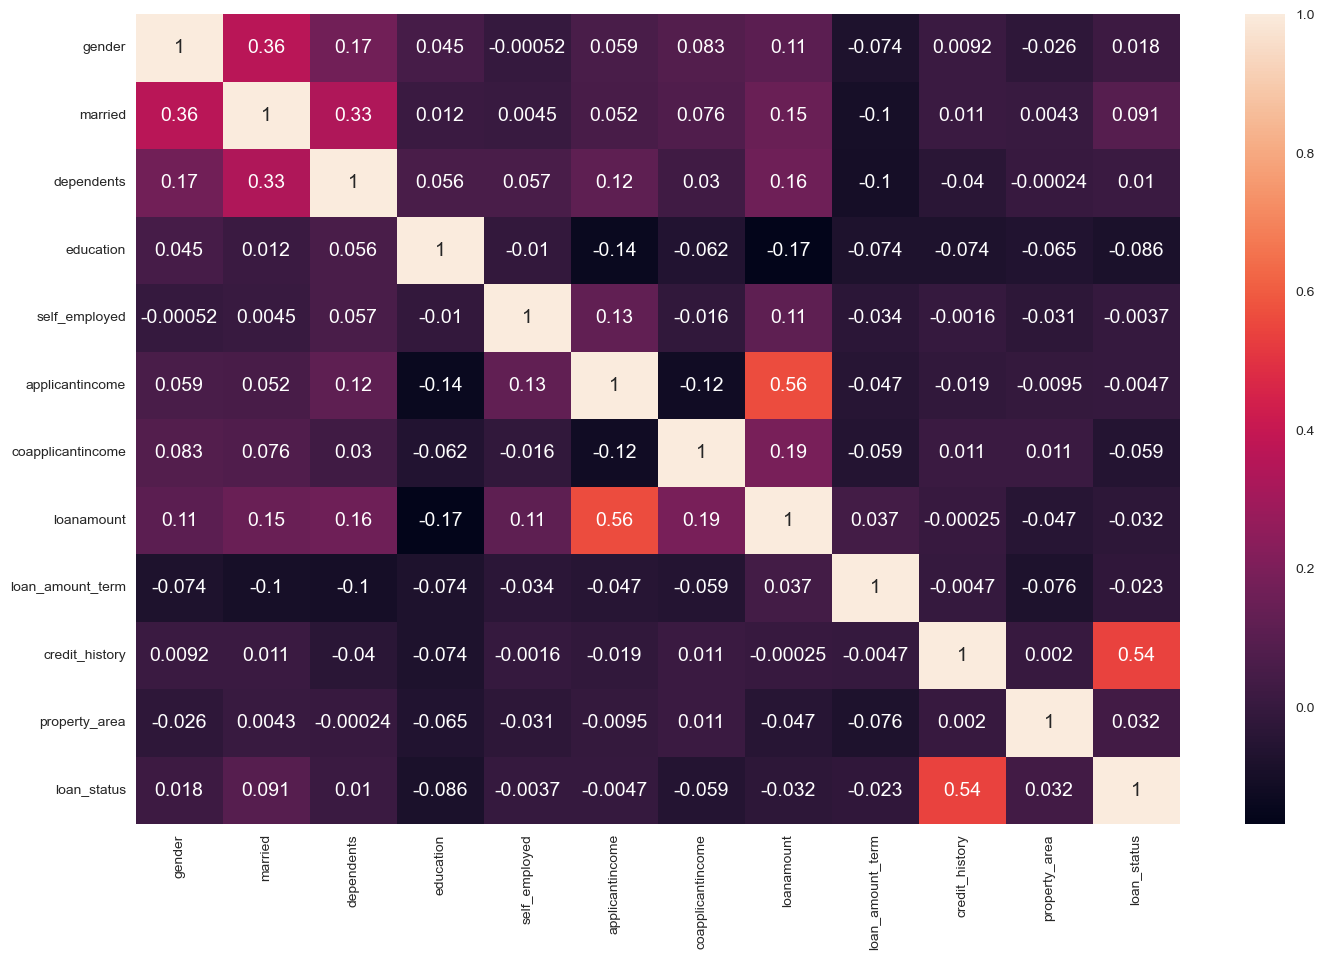

In [63]:
plt.figure(figsize = (15,10))
sns.heatmap(df3.corr(),annot=True)
plt.show()

In [64]:
df3.skew()

gender              -1.648795
married             -0.644850
dependents           1.015551
education            1.367622
self_employed        2.159796
applicantincome      6.539513
coapplicantincome    7.491531
loanamount           2.745407
loan_amount_term    -2.402112
credit_history      -2.021971
property_area       -0.066196
loan_status         -0.809998
dtype: float64

### removing the skewed data

In [65]:
df3[['applicantincome','coapplicantincome','loanamount']]=np.sqrt(df3[['applicantincome','coapplicantincome','loanamount']])

In [66]:
df3.skew()

gender              -1.648795
married             -0.644850
dependents           1.015551
education            1.367622
self_employed        2.159796
applicantincome      2.967286
coapplicantincome    0.979561
loanamount           1.351516
loan_amount_term    -2.402112
credit_history      -2.021971
property_area       -0.066196
loan_status         -0.809998
dtype: float64

In [67]:
df4=df3.copy()

## checking the outliers

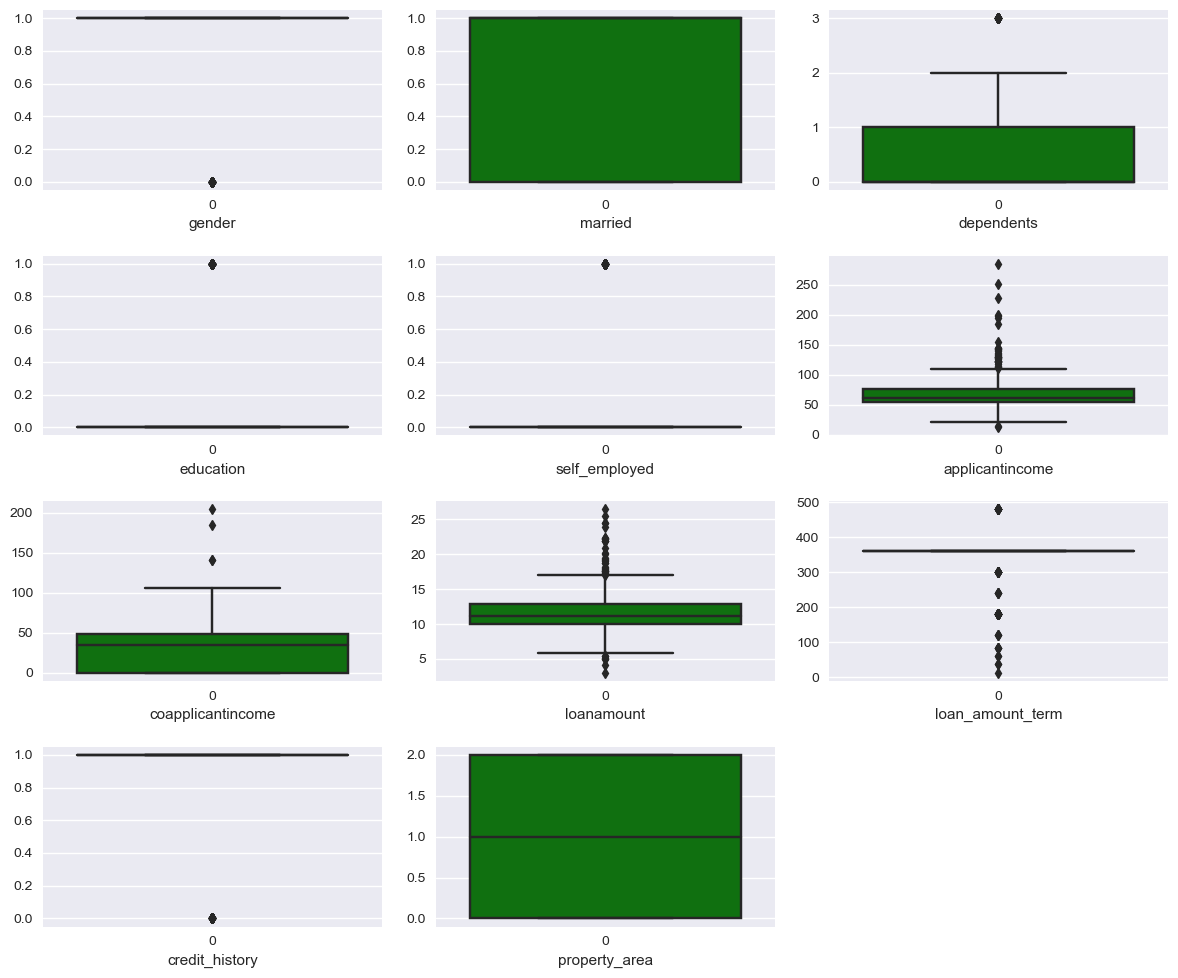

In [68]:
collist=df4[['gender', 'married', 'dependents', 'education',
             'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
             'loan_amount_term', 'credit_history', 'property_area', 'loan_status']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,11):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df4[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## removing the outliers

In [69]:
#1st quantile 
q1= df4.quantile(0.25)
#3rd quantile
q3=df4.quantile(0.75)
#IQR
iqr=q3-q1

In [70]:
Dependents=(q3.dependents + (1.5*iqr.dependents))
print(Dependents)   

index=np.where(df4['dependents']> Dependents)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

2.5
(563, 12)


,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,76.478755,0.000000,10.954451,360.0,1.0,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,608,1,1,0,0,0,56.850682,44.158804,10.392305,360.0,1.0,0,1
559,609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
560,611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
561,612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


In [71]:
applicant_income=(q3.applicantincome + (1.5*iqr.applicantincome))
print(applicant_income)   

index=np.where(df4['applicantincome']> applicant_income)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

109.84869740955085
(532, 12)


,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,76.478755,0.000000,10.954451,360.0,1.0,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,608,1,1,0,0,0,56.850682,44.158804,10.392305,360.0,1.0,0,1
528,609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
529,611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
530,612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


In [72]:
coapplicant_income=(q3.coapplicantincome + (1.5*iqr.coapplicantincome))
print(coapplicant_income)   

index=np.where(df4['coapplicantincome']> coapplicant_income)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

119.82389730771439
(529, 12)


,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,76.478755,0.000000,10.954451,360.0,1.0,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,608,1,1,0,0,0,56.850682,44.158804,10.392305,360.0,1.0,0,1
525,609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
526,611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
527,612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


In [73]:
loan_amount=(q3.loanamount + (1.5*iqr.loanamount))
print(loan_amount)   

index=np.where(df4['loanamount']> loan_amount)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

17.070013023867844
(518, 12)


,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,76.478755,0.000000,10.954451,360.0,1.0,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,608,1,1,0,0,0,56.850682,44.158804,10.392305,360.0,1.0,0,1
514,609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
515,611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
516,612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


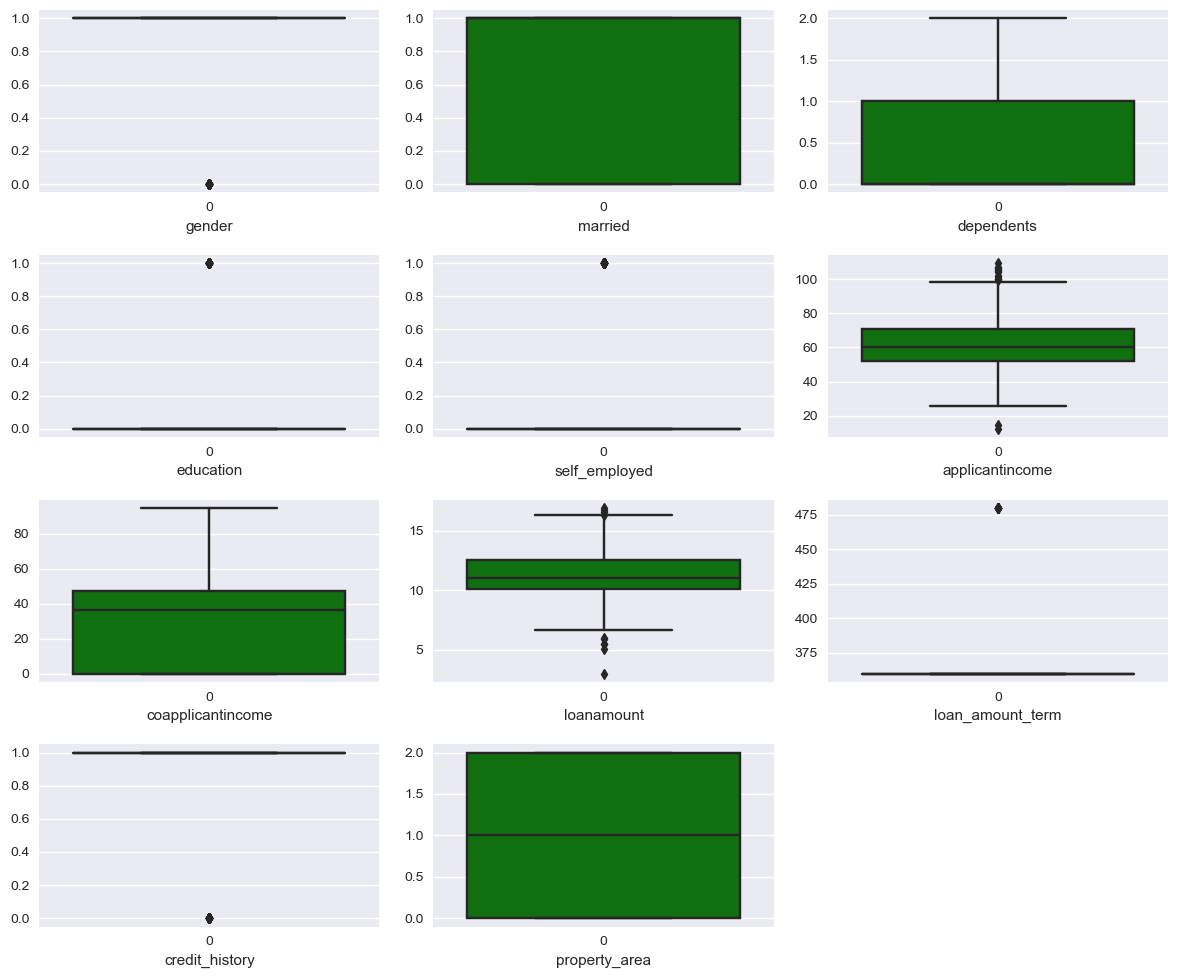

In [76]:
collist=df4[['gender', 'married', 'dependents', 'education',
             'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
             'loan_amount_term', 'credit_history', 'property_area', 'loan_status']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,11):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df4[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

In [75]:
loanamount_term=(q1.loan_amount_term - (1.5*iqr.loan_amount_term))
print(loanamount_term)   

index=np.where(df4['loan_amount_term'] <loanamount_term)
index

df4=df4.drop(df4.index[index])
print(df4.shape)

df4.reset_index()

360.0
(459, 12)


,index,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0,1,0,0,0,0,76.478755,0.000000,10.954451,360.0,1.0,2,1
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,360.0,1.0,0,0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,360.0,1.0,2,1
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,360.0,1.0,2,1
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,608,1,1,0,0,0,56.850682,44.158804,10.392305,360.0,1.0,0,1
455,609,0,0,0,0,0,53.851648,0.000000,8.426150,360.0,1.0,0,1
456,611,1,1,1,0,0,89.844310,15.491933,15.905974,360.0,1.0,2,1
457,612,1,1,2,0,0,87.080423,0.000000,13.674794,360.0,1.0,2,1


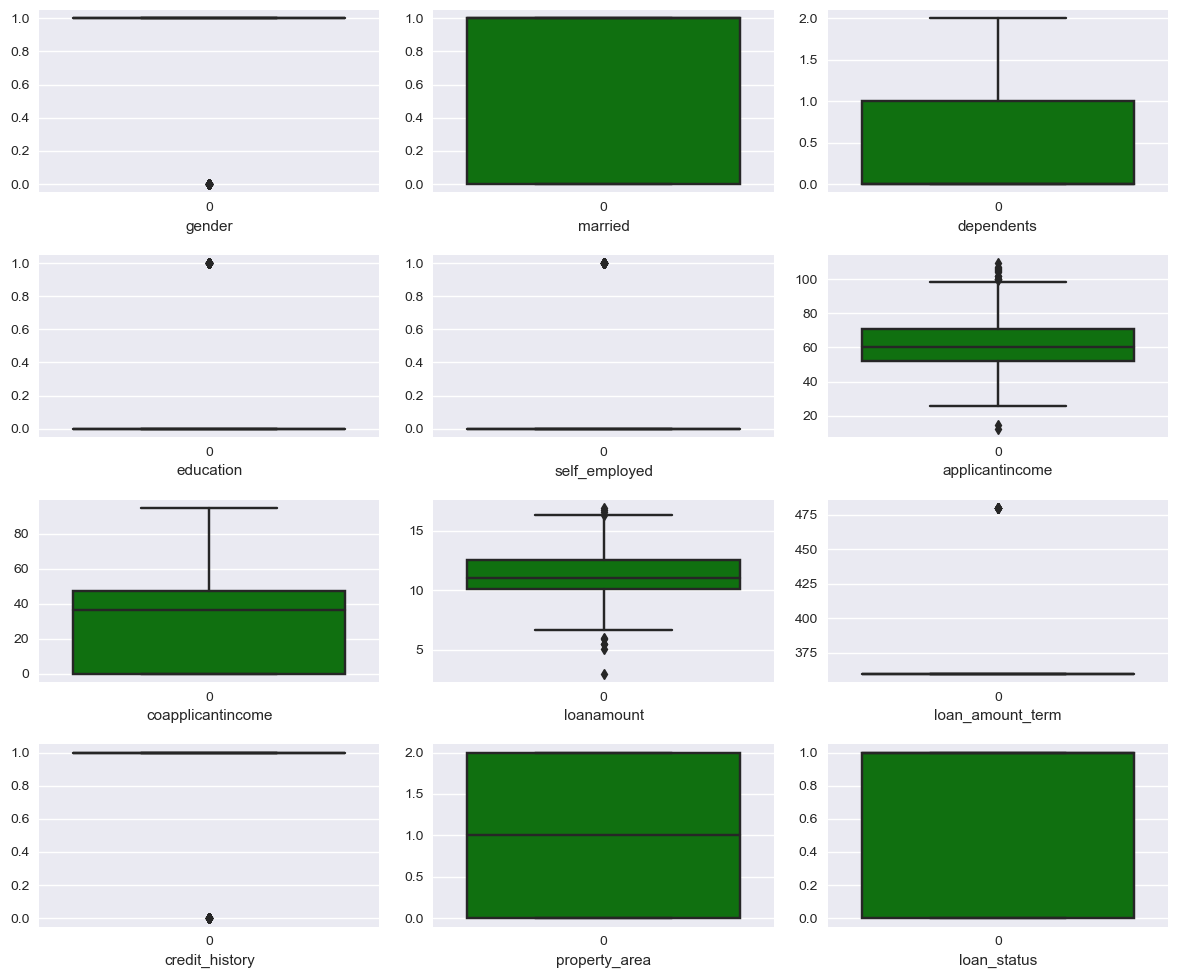

In [79]:
collist=df4[['gender', 'married', 'dependents', 'education',
             'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount',
             'loan_amount_term', 'credit_history', 'property_area', 'loan_status']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,12):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df4[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

## most outliers has removed

In [78]:
df5=df4.copy()

# spliting the target and features 

In [80]:
X=df5.drop('loan_status',axis=1)
X

y=df5['loan_status']
y

0      1
1      0
2      1
3      1
4      1
      ..
608    1
609    1
611    1
612    1
613    0
Name: loan_status, Length: 459, dtype: int32

In [81]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [85]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [86]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(459, 11)
(344, 11)
(115, 11)


# preparing the model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# 1.Logistic Regression

In [87]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.79      0.41      0.54        27
           1       0.84      0.97      0.90        88

    accuracy                           0.83       115
   macro avg       0.81      0.69      0.72       115
weighted avg       0.83      0.83      0.81       115



## cross val score

In [88]:
cross_val_score(model1,X,y,cv=10).mean()

0.8215942028985506

# 2. RandomForest Classifier

In [89]:
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54        27
           1       0.85      0.91      0.88        88

    accuracy                           0.81       115
   macro avg       0.74      0.70      0.71       115
weighted avg       0.80      0.81      0.80       115



## cross val score

In [90]:
cross_val_score(model2,X,y,cv=5).mean()

0.8039894887720974

# 3. Gradient Boosting Classifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
model3 = GradientBoostingClassifier(random_state=1)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47        27
           1       0.84      0.86      0.85        88

    accuracy                           0.77       115
   macro avg       0.67      0.65      0.66       115
weighted avg       0.76      0.77      0.76       115



## cross val score

In [92]:
cross_val_score(model3,X,y,cv=5).mean()

0.7756569517439083

# 4. Decision Tree Classifier

In [93]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.40      0.59      0.48        27
           1       0.85      0.73      0.79        88

    accuracy                           0.70       115
   macro avg       0.63      0.66      0.63       115
weighted avg       0.75      0.70      0.71       115



## cross val score

In [94]:
cross_val_score(model4,X,y,cv=5).mean()

0.7626134734830388

# 5.Ada Boost Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.46      0.41      0.43        27
           1       0.82      0.85      0.84        88

    accuracy                           0.75       115
   macro avg       0.64      0.63      0.63       115
weighted avg       0.74      0.75      0.74       115



## cross_val_score

In [98]:
cross_val_score(model5,X,y,cv=10).mean()

0.7866183574879226

# 6.KNeighbors Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
model6 = KNeighborsClassifier()
model6.fit(X_train, y_train)
y_pred6 = model6.predict(X_test)
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.60      0.44      0.51        27
           1       0.84      0.91      0.87        88

    accuracy                           0.80       115
   macro avg       0.72      0.68      0.69       115
weighted avg       0.79      0.80      0.79       115



## cross_val_score

In [99]:
cross_val_score(model6,X,y,cv=10).mean()

0.7865217391304347

## Model1 Gradient Boosting Classifier has highest accuracy with lowest difference to cross_val_score. so we tune this model

# hyper para meter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid={"C":[0.001,0.01,0.1,1,10],
            "penalty":['l1','l2'],
            "solver":['newton-cg','liblinear','sag']
           }

In [102]:
grid_search=GridSearchCV(estimator=model1, param_grid=param_grid,n_jobs=-1)

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'sag']})

In [104]:
best_param =grid_search.best_params_
print(best_param)

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [105]:
grid_search.best_score_

0.810997442455243

In [110]:
ggrid_search=LogisticRegression(C= 1, penalty= 'l2', solver= 'newton-cg')
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'liblinear', 'sag']})

In [111]:
y_pred11=grid_search.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred11))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        27
           1       0.84      0.97      0.90        88

    accuracy                           0.83       115
   macro avg       0.81      0.69      0.72       115
weighted avg       0.83      0.83      0.81       115



## model accuracy has increased positively 

## saving the model 

In [113]:
filename='loan_app.pkl'
pickle.dump(model1,open(filename,'wb'))

In [114]:
log =pickle.load(open('loan_app.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

83.47826086956522
